# 微信好友分析

## 获得数据

In [132]:
import itchat
import pandas
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import TencentYoutuyun
import numpy as np
%matplotlib inline

登陆微信网页版，需扫描二维码;获取friends数据，转成pandas.DataFrame格式，先导出，再导入，防止sns作图时出错

In [35]:
itchat.auto_login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as incipient


In [53]:
friends_wechat = itchat.get_friends(update = True)

friends_df = pandas.DataFrame(data = friends_wechat[1:])
# 因为friends[0]得出的数据是自己，所以要[1:]切片
friends_df.to_csv('wechat_friends_info.csv',index_label='id')

friends_row = pandas.read_csv('wechat_friends_info.csv',encoding = 'gbk')

## 清洗
字段太多，去掉不认识的、重复的<br>
每个字段是什么意思？

In [104]:
friends_row.columns

Index(['id', 'Alias', 'AppAccountFlag', 'AttrStatus', 'ChatRoomId', 'City',
       'ContactFlag', 'DisplayName', 'EncryChatRoomId', 'HeadImgUrl',
       'HideInputBarFlag', 'IsOwner', 'KeyWord', 'MemberCount', 'MemberList',
       'NickName', 'OwnerUin', 'PYInitial', 'PYQuanPin', 'Province',
       'RemarkName', 'RemarkPYInitial', 'RemarkPYQuanPin', 'Sex', 'Signature',
       'SnsFlag', 'StarFriend', 'Statues', 'Uin', 'UniFriend', 'UserName',
       'VerifyFlag'],
      dtype='object')

In [118]:
friends = friends_row[['id','NickName','RemarkName','Province','City','Sex',\
                   'Signature','HeadImgUrl']]
friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
id            199 non-null int64
NickName      199 non-null object
RemarkName    65 non-null object
Province      164 non-null object
City          158 non-null object
Sex           199 non-null int64
Signature     145 non-null object
HeadImgUrl    199 non-null object
dtypes: int64(2), object(6)
memory usage: 12.5+ KB


## 分析

### 性别分布

Text(0.5,1,'微信好友性别概况')

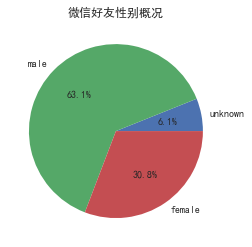

In [96]:
# 设置饼图的倾斜角度，1：不倾斜
plt.axes(aspect=1)
plt.rcParams['font.family'] = ['SimHei']
plt.pie(friends.groupby('Sex',axis=0).count()['NickName'],
       labels = ['unknown','male','female'],
       autopct='%.1f%%'   # 设置饼图中显示百分比
       )
plt.title('微信好友性别概况')

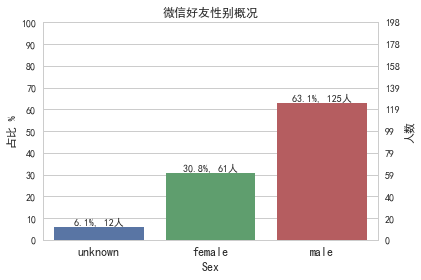

In [75]:
ncount = len(friends)
ax = sns.countplot(x='Sex',data=friends,order=[0,2,1])
plt.xlabel('Sex',fontsize=12)
plt.title('微信好友性别概况')
plt.rcParams['font.family'] = ['SimHei']

ax2 = ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax.set_ylabel('人数')
ax2.set_ylabel('占比 %')

# 让‘人数’纵坐标的值为整数
fmt = '%.0f'
yticks = matplotlib.ticker.FormatStrFormatter( fmt )
ax.yaxis.set_major_formatter( yticks )

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%, {:d}人'.format(100.*y/ncount,int(y)), (x.mean(), y), 
            ha='center', va='bottom') 

ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(11))

# 设置纵轴数据范围
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))

# 关闭坐标轴ax2 的横线
ax2.grid(None)

# 修改x轴上标签值 如此就不需要图例
a = ['unknown','female','male']
ax.set_xticklabels(a,fontsize=12);

上下两张图一对比，就能看出来为什么数据分析时都不推荐饼图了。<br>

### 位置分布

In [111]:
friends.groupby('Province',axis=0).count().sort_values('NickName',ascending=False)['NickName']

Province
广东              86
陕西              16
四川               6
北京               6
江苏               5
重庆               5
湖北               4
上海               4
浙江               3
香港               3
山东               3
广西               2
Paris            2
辽宁               2
山西               2
湖南               1
福建               1
河南               1
Barcelona        1
California       1
安徽               1
天津               1
云南               1
Washington       1
Pennsylvania     1
Others           1
Karlsruhe        1
Idaho            1
Canberra         1
黑龙江              1
Name: NickName, dtype: int64

在[BDP](https://me.bdp.cn/home.html)中使用“本周新增订单分布”作为模板，得到下图。
![联系人分布概况]()

### 头像

下载头像，保存到本地，判断头像是否为人像,<br>
接入[腾讯优图](http://open.youtu.qq.com/#/develop/new-join)即可判断

In [49]:
folder = 'E:\\MySQL_data\\wechat_friends_img\\'
os.path.exists(folder)
j = -1 # i为1时，j为0，取出的是id=0的好友头像，保证图片名和id一致
for i in friends_wechat:
    
    img = folder + '\\image{:d}.jpg'.format(j)
    img_data = itchat.get_head_img(userName = i['UserName'])
    if os.path.exists(img) == False :
        with open(img,'wb') as file:
            file.write(img_data)
    j += 1

In [68]:
appid = '*****'
secret_id = '******'
secret_key = '******'
userid = '******'
end_point = TencentYoutuyun.conf.API_YOUTU_END_POINT
youtu = TencentYoutuyun.YouTu(appid, secret_id, secret_key, userid, end_point)

{'errorcode': 0,
 'errormsg': 'OK',
 'face': [{'age': 22,
   'beauty': 87,
   'expression': 76,
   'face_id': '2489414698909367045',
   'face_shape': {'face_profile': [{'x': 147, 'y': 375},
     {'x': 152, 'y': 403},
     {'x': 159, 'y': 429},
     {'x': 169, 'y': 455},
     {'x': 183, 'y': 479},
     {'x': 203, 'y': 500},
     {'x': 227, 'y': 517},
     {'x': 252, 'y': 531},
     {'x': 278, 'y': 543},
     {'x': 304, 'y': 553},
     {'x': 331, 'y': 554},
     {'x': 357, 'y': 548},
     {'x': 380, 'y': 535},
     {'x': 404, 'y': 521},
     {'x': 428, 'y': 505},
     {'x': 449, 'y': 487},
     {'x': 466, 'y': 464},
     {'x': 478, 'y': 439},
     {'x': 486, 'y': 413},
     {'x': 491, 'y': 386},
     {'x': 494, 'y': 361}],
    'left_eye': [{'x': 173, 'y': 376},
     {'x': 191, 'y': 378},
     {'x': 210, 'y': 376},
     {'x': 228, 'y': 371},
     {'x': 245, 'y': 364},
     {'x': 227, 'y': 355},
     {'x': 206, 'y': 354},
     {'x': 187, 'y': 361}],
    'left_eyebrow': [{'x': 140, 'y': 322

In [140]:
friends['ishuman'] = 0

E:\miniconda\envs\course_py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
for i in friends['id']:
    result = youtu.DetectFace('E:\\MySQL_data\\wechat_friends_img\\image{}.jpg'.format(i),
                          mode = 0, data_type = 0)
    if result['face']:
        friends.set_value(i,'ishuman',1)
    else:
        friends.set_value(i,'ishuman',0)

In [96]:
friends['ishuman'].mean()

0.38693467336683418

[Text(0,0,'使用人像'), Text(0,0,'不使用人像')]

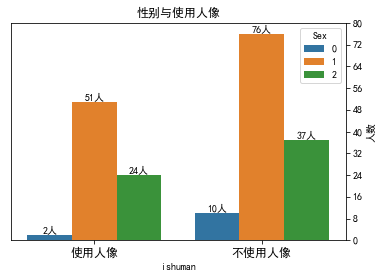

In [177]:
plt.rcParams['font.family'] = ['SimHei']
plt.title('性别与使用人像')
ax = sns.countplot(x='ishuman',hue='Sex',data=friends,order = [1,0])
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_ylabel('人数')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:d}人'.format(int(y)), (x.mean(), y), 
            ha='center', va='bottom') 
    
ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(11))
ax.set_ylim(0,80)
xtick_labels = ['使用人像','不使用人像']
ax.set_xticklabels(xtick_labels,fontsize=12);

结论：男、女在是否使用人脸作为头像上无明显差异<br>
未注明性别的，更不愿意使用人脸作为头像

### 签名

In [ ]:
friends['issign'] = friends['Signature'].notnull()

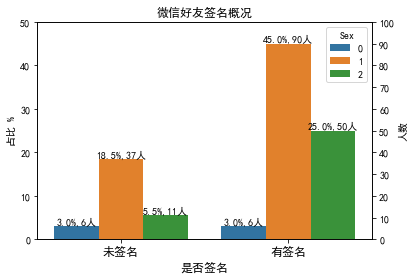

In [179]:
ncount = len(friends)
ax = sns.countplot(x='issign',hue = 'Sex',data=friends)
plt.rcParams['font.family'] = ['SimHei']
plt.xlabel('是否签名',fontsize=12)
plt.title('微信好友签名概况')

ax2 = ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax.set_ylabel('人数')
ax2.set_ylabel('占比 %')

# 让‘人数’纵坐标的值为整数
fmt = '%.0f'
yticks = matplotlib.ticker.FormatStrFormatter( fmt )
ax.yaxis.set_major_formatter( yticks )

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%,{:d}人'.format(100.*y/ncount,int(y)), (x.mean(), y), 
            ha='center', va='bottom') 

ax.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(11))

# 设置纵轴数据范围
ax2.set_ylim(0,50)
ax.set_ylim(0,100)

ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))

# 关闭坐标轴ax2 的横线
# ax2.grid(None)

# 修改x轴上标签值 如此就不需要图例
a = ['未签名','有签名']
ax.set_xticklabels(a,fontsize=12);

和男性相比，女性使用签名的比例更大

## 保存数据

In [182]:
friends.to_csv('wechat_friends_data.csv',
               index = False,  # 因为已经有了id这列
               columns = ['id','Sex','issign','ishuman','Province','City']
              )